# Neural Image Style Transfer using PyTorch

**Repo Link**: [https://github.com/SherryS997/Deep-Learning-with-PyTorch-Neural-Style-Transfer](https://github.com/SherryS997/Deep-Learning-with-PyTorch-Neural-Style-Transfer)

## Introduction and Overview

Neural Image Style Transfer, a fascinating application of deep learning, involves the fusion of artistic style from one image onto the content of another. Leveraging the power of PyTorch, this project delves into the realm of artistic transformation, exploring the amalgamation of visual styles through convolutional neural networks.

The core concept involves utilizing a pre-trained VGG19 model from PyTorch's torchvision library. This model serves as the foundation for extracting features that represent the content and style of input images. Through a series of meticulously designed functions, the project performs image preprocessing, defining loss functions for both content and style, and orchestrating a training loop to optimize a target image that exhibits the desired content with the stylized features of another image.

By employing a blend of content and style loss functions and optimizing via an Adam optimizer, this project iteratively refines the target image, resulting in captivating visual amalgamations that showcase the content of one image infused with the artistic essence of another.

This Jupyter Notebook project encapsulates the essence of neural style transfer, offering a comprehensive and practical implementation using PyTorch, paving the way for creative exploration and experimentation in the realm of artificial intelligence and image transformation.

## Loading and Preparing Pretrained VGG19 Model for Neural Style Transfer

The "Loading Pretrained VGG Model" section focuses on importing and configuring the VGG19 model, which serves as the backbone for extracting features in the neural style transfer process.

### Code and its Description:

In [1]:
import torch
from torchvision import models
import warnings

warnings.filterwarnings("ignore")

# Load VGG19 pretrained model
vgg = models.vgg19(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

This segment initializes the VGG19 model pretrained on ImageNet and prints its architecture summary, showcasing the layers and structure of the VGG19 model.

In [2]:
# Extract just the features part of the VGG model
vgg_features = vgg.features

Here, only the feature extraction part of the VGG model is retained by assigning `vgg.features` to `vgg_features`.

In [3]:
# Freeze parameters in the features network
for param in vgg_features.parameters():
    param.requires_grad_(False)

# Check for GPU availability and move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
vgg_features.to(device)

cpu


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

This code snippet freezes the parameters (weights) of the feature extraction part to prevent them from being updated during training. It also checks for GPU availability and moves the VGG feature extraction module to the available device (GPU if available, else CPU) for computation.

### Purpose:
The purpose of this section is to set up the VGG19 model, which acts as a feature extractor in the neural style transfer process. By loading a pretrained model and extracting only the feature extraction part while freezing its weights, it ensures that during style transfer optimization, only the target image's pixels are adjusted to match the style and content, utilizing the VGG model solely for feature extraction without altering its learned representations. Moreover, the model is moved to the appropriate device for efficient computation.

## Image Preprocessing: Transforming Raw Images into Compatible Tensors

The "Image Preprocessing" section is dedicated to preparing raw images for neural style transfer by converting them into normalized tensors. This step involves several transformations to ensure compatibility with deep learning models while maintaining essential image features.

### Code and its Description:

In [4]:
from PIL import Image
from torchvision import transforms as T

def preprocess_image(img_path, max_size=500):
    img = Image.open(img_path).convert("RGB")
    
    size = max_size if max(img.size) > max_size else max(img.size)
    
    img_transforms = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = img_transforms(img)
    image = image.unsqueeze(0)
    return image

This code defines the `preprocess_image` function responsible for image preprocessing. It loads the image from the specified path, converts it to the RGB format, resizes it while maintaining its aspect ratio based on the `max_size` parameter, converts it into a PyTorch tensor, and applies normalization using specific mean and standard deviation values.

In [5]:
# Preprocess content and style images
content_image = preprocess_image("./Project-NST/content11.jpg").to(device)
style_image = preprocess_image("./Project-NST/style11.jpg").to(device)

print("Content shape:", content_image.shape)
print("Style shape:", style_image.shape)

Content shape: torch.Size([1, 3, 259, 345])
Style shape: torch.Size([1, 3, 500, 577])


Here, the code applies the `preprocess_image` function to the content and style images (`content11.jpg` and `style11.jpg`). It then prints the shapes of the resulting preprocessed tensors to verify the successful transformation of the images into compatible tensors for neural style transfer.

## Image Deprocessing: Transforming Normalized Tensors to Displayable Images

The "Image Deprocessing" section serves to reverse the normalization process applied to the images, converting normalized tensors back into displayable images suitable for visualization. This step is crucial after preprocessing images for neural style transfer to interpret and visualize the processed content and style images.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess_image(tensor):
    image = tensor.to("cpu").clone().detach().numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    image = np.clip(image, 0, 1)
    return image

content_deprocessed = deprocess_image(content_image)
style_deprocessed = deprocess_image(style_image)

print("Content shape:", content_deprocessed.shape)
print("Style shape:", style_deprocessed.shape)

Content shape: (259, 345, 3)
Style shape: (500, 577, 3)


This code defines the `deprocess_image` function responsible for reversing the normalization applied during preprocessing. It takes a tensor as input and performs operations to restore the image to its original form suitable for display. Then, the function is applied to the preprocessed content and style images (`content_image` and `style_image`) to obtain deprocessed images.

#### Visualization:


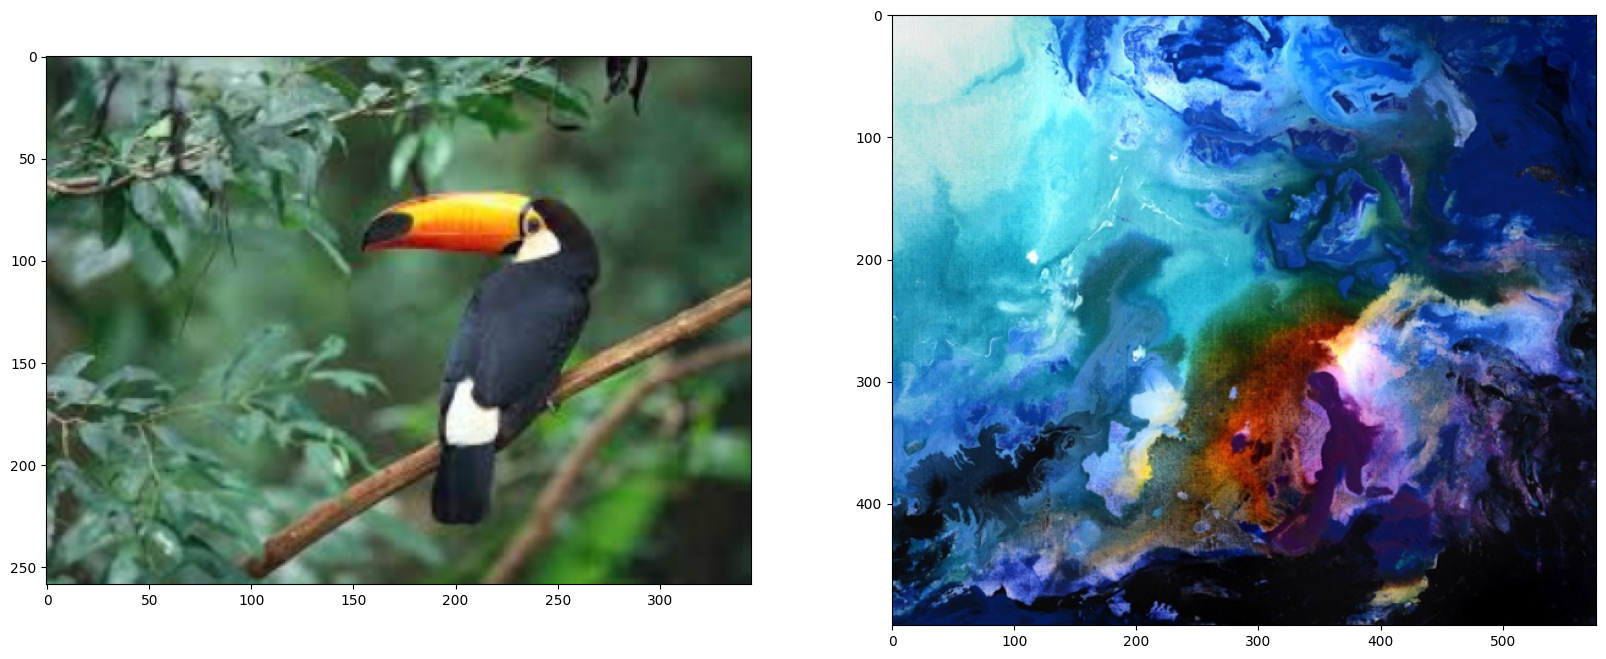

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(content_deprocessed)
ax2.imshow(style_deprocessed)

This code snippet visualizes the deprocessed content and style images using Matplotlib to display the images side by side in a single figure, allowing a visual comparison between the original content and style images after deprocessing.

## Feature Extraction and Gram Matrix Calculation: Analyzing Image Features for Style Representation

The "Feature Extraction and Gram Matrix Calculation" section focuses on extracting relevant features from the content and style images using a pre-trained model, followed by the computation of Gram matrices for style representation.

In [8]:
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}
    x = image

    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x

    return features

def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    tensor = tensor.view(c, h*w)
    gram = torch.mm(tensor, tensor.t())
    return gram

# Get content and style features
content_features = get_features(content_image, vgg_features)
style_features = get_features(style_image, vgg_features)

![](./images/nwxnh.png)

![](./images/gram.webp)

In [9]:
# Create style Gram matrices
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

**Feature Extraction (`get_features`):** This function `get_features` takes an image tensor (`content_image` or `style_image`) and a pre-trained model (`vgg_features`). It iterates through the layers of the model, capturing the activations at specific layers defined in the `layers` dictionary. The extracted features are stored in the `content_features` and `style_features` dictionaries for the content and style images, respectively.

**Gram Matrix Calculation (`gram_matrix`):** The `gram_matrix` function computes the Gram matrix for a given tensor. It reshapes the tensor and performs matrix multiplication to calculate the Gram matrix, which represents the correlations between different feature maps in a layer.

**Style Gram Matrices:** The code snippet `style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}` computes the Gram matrices for the style features extracted from various layers of the style image.

This section is pivotal in extracting meaningful features from the content and style images and further processing them into Gram matrices, which play a crucial role in defining the style representation required for neural style transfer. These matrices capture the correlations among different features, contributing to the artistic style representation of the style image.

## Defining Loss Functions for Neural Style Transfer

In the "Creating Style and Content Loss Function" section, the code establishes two key loss functions—content loss and style loss—integral to the optimization process in neural style transfer.

### Content Loss Function:

In [10]:
def content_loss(target_conv4_2, content_conv4_2):
    loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)
    return loss

The `content_loss` function computes the content loss between the target image's specific convolutional layer activations (`target_conv4_2`) and the content image's activations (`content_conv4_2`). It calculates the mean squared difference between these activations, representing the deviation in content information.

### Style Loss Function:

In [11]:
def style_loss(weights, target_features, style_grams):
    loss = 0

    for layer in weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        b, c, h, w = target_feature.shape
        layer_loss = weights[layer] * torch.mean((target_gram - style_gram) ** 2)
        loss += layer_loss / (c * h * w)

    return loss

style_weights = {
    "conv1_1": 1.0,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2
}

The `style_loss` function calculates the style loss by iterating through specified layers, computing the Gram matrices for the target and style images, and measuring the mean squared difference between their Gram matrices. This captures the stylistic differences between the target and style images across multiple layers with weighted contributions specified in `style_weights`.

### Optimization and Total Loss Function:

In [13]:
# Example usage of content and style loss
target_image = content_image.clone().requires_grad_(True).to(device)
target_features = get_features(target_image, vgg_features)

In [14]:
from torch import optim

optimizer = optim.Adam([target_image], lr=0.003)

alpha = 1
beta = 1e5

def total_loss(alpha, beta, style_loss, content_loss):
    return alpha * content_loss + beta * style_loss

The code sets up an Adam optimizer for the target image and defines `alpha` and `beta` as weights to balance the content and style losses. The `total_loss` function combines the content and style losses with their respective weights to form the overall loss function that the optimization process aims to minimize.

This section establishes the mathematical frameworks for quantifying content and style differences between images, essential for guiding the neural style transfer optimization process. Adjusting `alpha` and `beta` enables fine-tuning the emphasis between content and style in the generated images.

## Training Loop: Iterative Optimization for Neural Style Transfer

The "Training Loop" section orchestrates the iterative optimization process used in neural style transfer to generate a stylized image. This loop iterates through multiple epochs, adjusting the target image to minimize the total loss, a combination of content and style losses, using optimization techniques.

### Code and its Description:

In [16]:
epochs = 3000
show_every = 500
results = []

for i in range(epochs):
    target_features = get_features(target_image, vgg_features)

    content_loss_val = content_loss(target_features["conv4_2"], content_features["conv4_2"])
    style_loss_val = style_loss(style_weights, target_features, style_grams)
    total_loss_val = total_loss(alpha, beta, style_loss_val, content_loss_val)

    optimizer.zero_grad()
    total_loss_val.backward()
    optimizer.step()

    if i % show_every == 0:
        print(f"Total loss at Epoch {i}: {total_loss_val}")
        results.append(deprocess_image(target_image.detach()))

Total loss at Epoch 0: 280201792.0
Total loss at Epoch 500: 20301662.0
Total loss at Epoch 1000: 9346065.0
Total loss at Epoch 1500: 7137745.0
Total loss at Epoch 2000: 5871047.5
Total loss at Epoch 2500: 5056373.0


This code initiates a loop that iterates over a specified number of epochs (`epochs`) to optimize the target image. Within each iteration:
- The features of the current target image are extracted using `get_features`.
- Content loss (`content_loss_val`) and style loss (`style_loss_val`) are computed based on the target image's features and precomputed content and style features.
- The total loss (`total_loss_val`), combining content and style losses, is calculated.
- The optimizer's gradient is reset, and the total loss is used to perform backpropagation (`total_loss_val.backward()`) and update the target image (`optimizer.step()`).

Additionally, at specified intervals (`show_every`), the current total loss is printed, providing insights into the optimization process. The stylized images at these intervals are also captured and stored in `results` for visualization.

## Results Visualization: Displaying Stages of Style Transfer Process

The "Results Visualization" section aims to showcase the progression of the style transfer algorithm by displaying multiple stages of the generated images throughout the training process. This allows for a visual inspection of how the stylized image evolves over different epochs or iterations during the neural style transfer.

### Code and its Description:

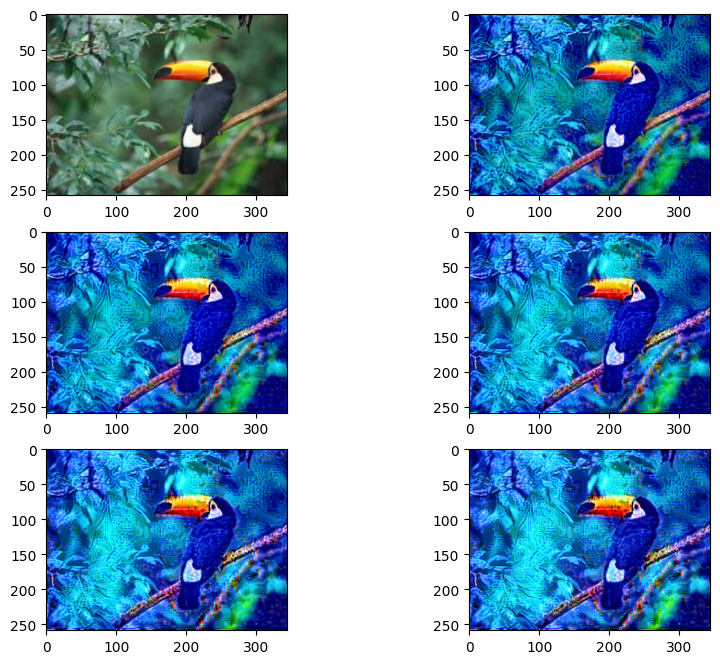

In [17]:
plt.figure(figsize=(10, 8))

for i in range(len(results)):
    plt.subplot(3, 2, i + 1)
    plt.imshow(results[i])

plt.show()

The code snippet sets up a Matplotlib figure to display the generated images resulting from the style transfer process. It iterates through the `results` list containing images obtained at different stages of training. For each image in the `results` list, it plots it in a subplot within the Matplotlib figure, arranging the images in a grid format.

## Final Results: Comparison of Stylized Image and Original Content

The "Final Results" section encapsulates the comparison between the stylized image generated through neural style transfer and the original content image. It enables a visual assessment of the transformation achieved by the neural network, showcasing the artistic style transferred onto the content image.

### Code and its Description:

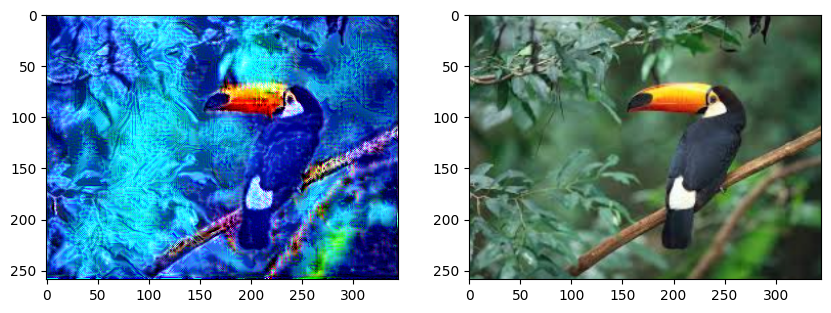

In [18]:
target_final = deprocess_image(target_image.detach())
content_copy = deprocess_image(content_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(target_final)
ax2.imshow(content_copy)

This code snippet depicts the final stage of the neural style transfer process. It applies the `deprocess_image` function to the stylized image (`target_image`) and the original content image (`content_image`). Subsequently, it utilizes Matplotlib to exhibit these images side by side within a single figure for easy comparison.

## Conclusion

The journey through this notebook on Neural Image Style Transfer using PyTorch has been an intriguing exploration into the fusion of art and artificial intelligence. Leveraging the capabilities of pre-trained VGG19 models, this project embarked on a creative endeavor, showcasing the amalgamation of visual styles from one image onto the content of another.

By harnessing the power of deep learning and convolutional neural networks, this endeavor unveiled the essence of content and style representations within images, paving the way for captivating transformations. Through meticulous preprocessing, feature extraction, loss function definitions, and iterative optimization, this notebook illustrated the step-by-step process of generating stylized images, evolving dynamically over epochs.

The visual journey depicted the progressive refinement of the stylized image, capturing the essence of artistic style transferred onto the original content. This journey, driven by the interplay of content and style losses, demonstrated the network's ability to distill and blend artistic characteristics into a visually appealing fusion.

In essence, this notebook encapsulates the intricate orchestration of machine learning techniques, showcasing the neural style transfer process, and offers a gateway for further exploration and experimentation in the realms of artificial intelligence, creativity, and image transformation.